In [32]:
%pip install spark-nlp

In [33]:
!git clone https://github.com/MonoPT/Big-Data.git /content/temp
!mv /content/temp/* /content/
!rm -r /content/temp/

Cloning into '/content/temp'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 91 (delta 29), reused 75 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 21.36 KiB | 10.68 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Filtering content: 100% (12/12), 841.52 MiB | 20.18 MiB/s, done.
mv: cannot move '/content/temp/data' to '/content/data': Directory not empty
mv: cannot move '/content/temp/src' to '/content/src': Directory not empty


In [34]:
import os
os.chdir("/content/src")

In [35]:
from utils import load_data

data = load_data.LoadData("/content/data")
spark = data.spark

In [36]:
print(type(data.reviews))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
data.genres.show(20)

+---+--------------------+
| id|                name|
+---+--------------------+
|  1|            Aventură|
|  2|Многопользователь...|
|  3|           Nezávislé|
|  4|           Strategie|
|  5|            Strategy|
|  6|             Acțiune|
|  7|          インディー|
|  8|          アクション|
|  9|   Acesso Antecipado|
| 10|          Simulaatio|
| 11|          Simulation|
| 12|      Sexual Content|
| 13|              Azione|
| 14|             Aksiyon|
| 15|              Racing|
| 16|Massively Multipl...|
| 17|         Simuladores|
| 18|             Eventyr|
| 19|                 MMO|
| 20|          Szimuláció|
+---+--------------------+
only showing top 20 rows



In [ ]:
df = data.reviews

In [42]:
from pyspark.sql.functions import col, sum, when
import matplotlib.pyplot as plt
import seaborn as sns

def show_nulls_log(df):
    # Contar nulos por coluna
    null_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])

    # Converter para Pandas e transformar para formato longo
    null_counts_pd = null_counts.toPandas().melt(var_name='Coluna', value_name='Nulos')

    # Filtrar colunas com pelo menos 1 nulo (evita problemas na escala log)
    null_counts_pd = null_counts_pd[null_counts_pd['Nulos'] > 0]

    # Ordenar do maior para o menor
    null_counts_pd = null_counts_pd.sort_values(by='Nulos', ascending=False)

    # Configurar estilo
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 10))

    # Criar paleta com mesmo tamanho que número de barras
    palette = sns.color_palette("viridis", len(null_counts_pd))

    # Gráfico de barras horizontais
    ax = sns.barplot(
        x='Nulos',
        y='Coluna',
        data=null_counts_pd,
        palette=palette
    )

    # Escala log no eixo X
    ax.set_xscale('log')

    # Adicionar número de nulos no final de cada barra
    for patch in ax.patches:
        width = patch.get_width()
        y = patch.get_y() + patch.get_height() / 2
        ax.text(width * 1.1, y, str(int(width)), va='center', fontsize=10)

    plt.title('Número de valores nulos por coluna (escala log)', fontsize=16)
    plt.xlabel('Número de Nulos (escala log)', fontsize=12)
    plt.ylabel('Colunas', fontsize=12)
    plt.subplots_adjust(left=0.25, right=0.95)
    plt.show()

/tmp/ipython-input-1297621070.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


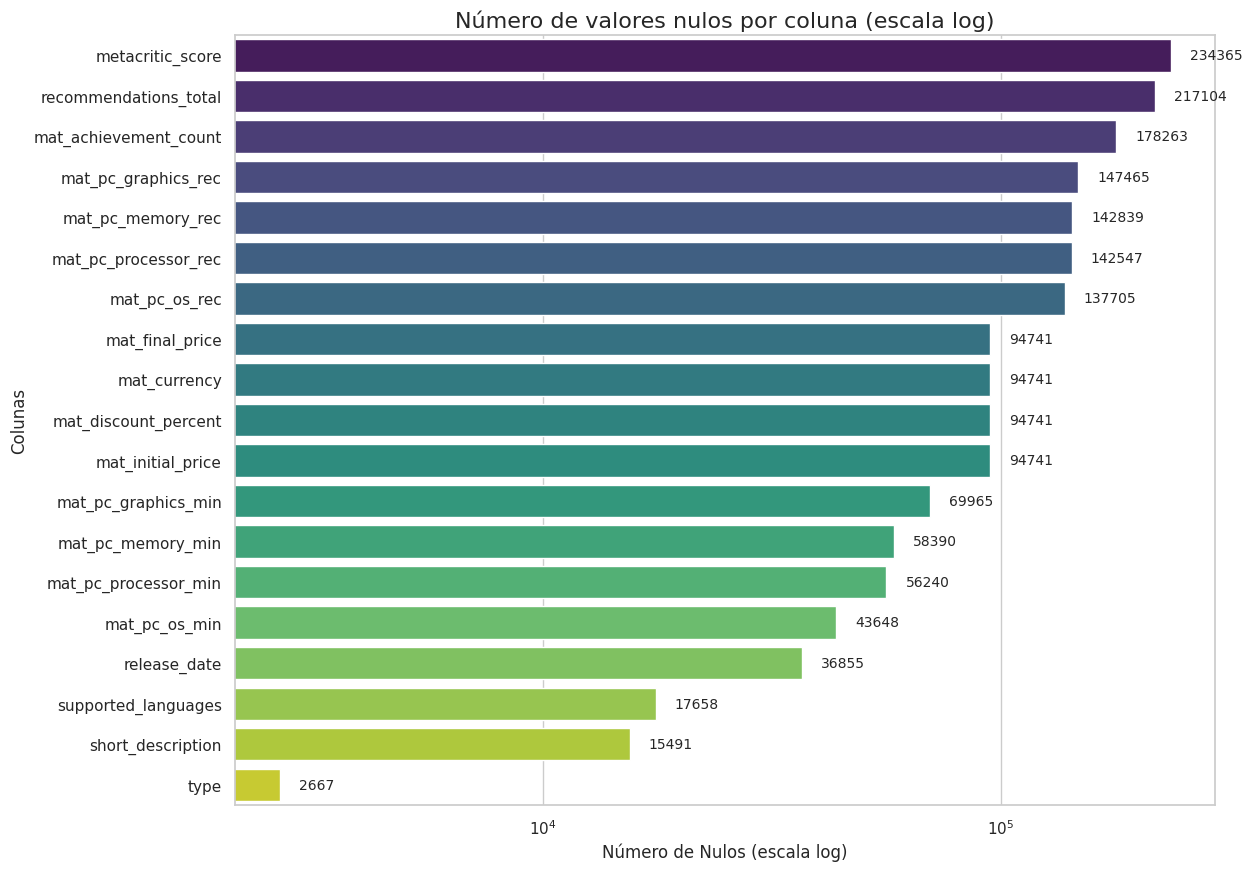

In [ ]:
dfs = data.dataframes()

#show_nulls_log(data.applications)